<a href="https://colab.research.google.com/github/22zunaid/Data-science/blob/master/stock%20predcition1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [43]:
df=pd.read_csv("TTM.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,11.54,11.69,11.40,11.68,11.68,2503100
1,2020-02-04,11.78,11.88,11.69,11.73,11.73,1757500
2,2020-02-05,12.82,12.90,12.60,12.64,12.64,2380700
3,2020-02-06,12.73,12.73,12.32,12.36,12.36,2399900
4,2020-02-07,12.08,12.08,11.85,11.91,11.91,1851000


In [44]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

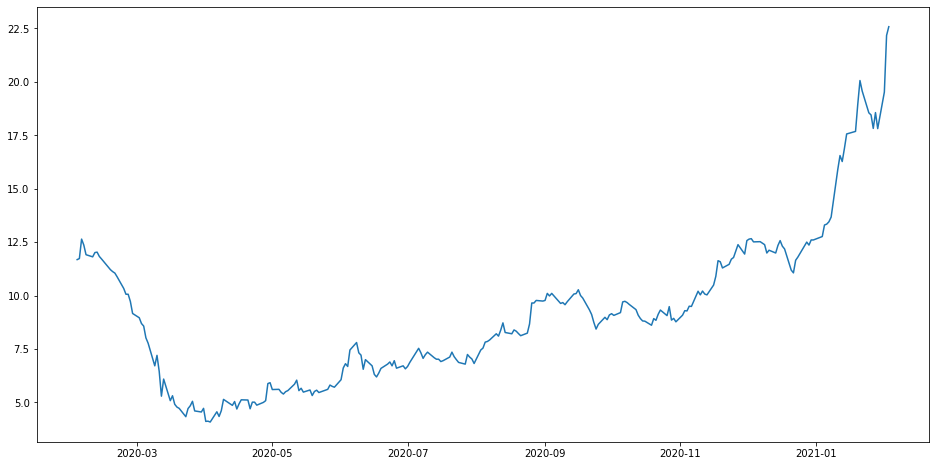

In [45]:
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [46]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [47]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [48]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [49]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [50]:
final_dataset=new_dataset.values

In [51]:
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [52]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [53]:
x_train_data,y_train_data=[],[]

In [54]:
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    

In [55]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)


In [56]:
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [57]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

194/194 - 6s - loss: 0.0078


In [58]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

IndexError: ignored

In [ ]:
lstm_model.save("saved_lstm_model.h5")

In [ ]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=prediction_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])